14.43448806732786 lyr


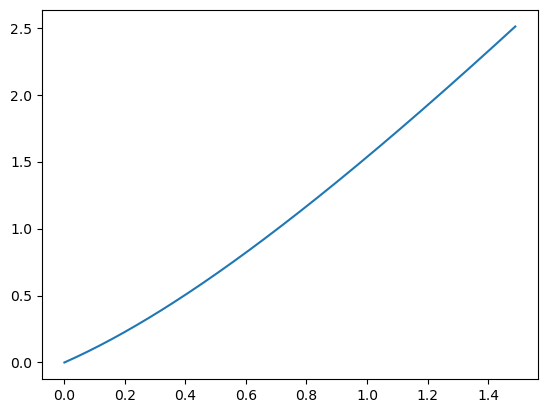

In [1]:
%matplotlib inline
import matplotlib
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from scipy.stats import chisquare
from astropy.cosmology import Planck15
from astropy import constants, units
import parameters

DefaultSize=[10,6]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
axis_font = {'name':'Arial', 'size':'18'}

title_font = {'name':'Arial', 'size':'18'}

def d_planck15(z):
    R0 = (constants.c)/(Planck15.H0)
    d_L = (Planck15.luminosity_distance(z))/R0.to(units.Mpc)
    plt.plot(z, d_L)
    R0=R0.to(units.lyr)/1e9
    return R0,d_L
z = np.arange(0.0,1.5,0.01)
R0_GLY,d_L=d_planck15(z)
R0_GLY_CMB=R0_GLY
print(R0_GLY)
HubbleGRData=pd.DataFrame()
HubbleGRData['z']=z
HubbleGRData['d']=d_L

# http://astronomy.swin.edu.au/cosmos/D/Distance+Modulus


SCPData = pd.ExcelFile(parameters.supernovaAddress + 'SCPUnionData.xls').parse('Sheet2')
angle=math.pi/4
# First let's create a set of lambda-shifts

# Union Compilation Magnitude vs. Redshift Table
# An ASCII table with tab-separated columns: Supernova Name, Redshift, Distance Modulus, and Distance Modulus Error. 
# For Union2.1, there is an additional column for the probability that the supernova 
# was hosted by a low-mass galaxy.

z = SCPData['redshift']


In [2]:
H0=69.69 *units.km/units.s/units.Mpc
H0_saved=H0
R0Diff=R0_GLY-(constants.c/H0).to(units.lyr)
R0_GLY=(constants.c/H0).to(units.lyr)/1E9
R0_GLY

<Quantity 14.03059581 lyr>

In [3]:
H0=1
c=1
R0=1
pi4=math.pi/4.0
sqrt2=math.sqrt(2)
def alphaZ(x):
    alpha = math.pi/4 - math.asin(1/math.sqrt(2)/(1+x))
    return alpha

def z_Out_Of_Alpha(alpha):
    z = 1.0/math.sin(pi4-alpha)/sqrt2-1.0
    return z

def alpha_Out_Of_d_HU(d_HU):
    alpha =  pi4-np.asin((1.0-d_HU)/sqrt2)
    return alpha
    
def z_Out_Of_d_HU(d_HU):
    alpha= alpha_Out_Of_d_HU(d_HU)
    z = z_Out_Of_Alpha(alpha)
    return z

def d_HU_epoch(R0,z):
    alpha = alphaZ(z)
    d_HU=R0*(1- math.cos(alpha)+math.sin(alpha))
    return d_HU



The distance d_HU is the arc on the outter circumference.  Later that distance will be converted on d_HU_corrected to reflect the point-to-point distance between our observation point and the position in the 4D Spatial manifold where the Supernova exploded.

Remember that

$$ \frac {\lambda_0}{\lambda_{Obs}}  = \frac{1}{1+z} = \sqrt2 sin(\frac{\pi}{4}-\alpha))$$

So
 $$  \alpha=  \frac{\pi}{4}- asin(\frac{1}{\sqrt2(1+z)})   )     $$


so
                    
                    alpha = [math.pi/4 - math.asin(/math.sqrt(2)/(1+x)) for x in z]

The scaling factor  $$G_f = \frac {R_0}{R(t)} = \frac {1}{(cos(\alpha)-sin(\alpha))}$$

The value of d', the actual distance is derived from the triangle law

$$\frac{sin(\alpha)}{d'} = \frac{sin(\frac{3\pi}{4})}{R_0} =  \frac{sin(\frac{\pi}{4} - \alpha)}{R(t)}$$


$$ {d'}=\sqrt2 R_0 sin(\alpha)= \sqrt2 R_0 sin(\frac{\pi}{4}-asin(\frac{1}{\sqrt2(1+z)})) $$

The distance between Universe epochs is what is traversed at the speed of light c on our expanding hypersphere and that is given by:

$$ d_{epoch}(t) = \frac {R_0-R(t)}{R_0} = 1 - \frac{1}{G_f}= 1-\frac {R(t)}{R_0} =1- cos(\alpha)+sin(\alpha)   $$
or 
$$ d(z) =1- cos(\alpha)+sin(\alpha)   $$
where 
 $$  \alpha=  \frac{\pi}{4}- asin(\frac{1}{\sqrt2(1+z)})   )     $$

This value is the one used on the predictions of the Hypergeometrical Universe.  This is the distance travelled by a light entity traveling at the speed of light c, during the time the Universe took to reach our epoch.  This is equivalent to the distance d on our epoch.  This is the appropriate mapping since in the HU model, light travels at $\sqrt2 c$ within a 4D spatial manifold.



In [4]:
# Let define a function for our overestimated distances
# CORRECTION TO ABSOLUTE LUMINOSITY FALLING AS G^{-3.33}


def overestimatedDistances(z):
    overestimatedDistances=[]
    for y in z:
        x=alphaZ(y)
        overestimatedDistances. append((1-np.cos(x)+np.sin(x))*(np.cos(x)-np.sin(x))**(-1.66)) #correction here
    return overestimatedDistances

 

In [5]:
SCPData["d"], R0

(0       0.221949
 1       0.245194
 2       0.216688
 3       0.201182
 4       0.262260
          ...    
 575    33.663647
 576    30.134972
 577    33.388933
 578    30.825139
 579    29.813344
 Name: d, Length: 580, dtype: float64,
 1)

In [6]:
# All the light coming from supernovae maps initially to the cosmological region [0,pi/4]
# no modifications done to initial data
d_bar_measured= SCPData["d"]/R0_GLY

In [7]:
 SCPData["d"]

0       0.221949
1       0.245194
2       0.216688
3       0.201182
4       0.262260
         ...    
575    33.663647
576    30.134972
577    33.388933
578    30.825139
579    29.813344
Name: d, Length: 580, dtype: float64

# CORRECTION TO ABSOLUTE LUMINOSITY FALLING AS G^{-3.33}
# THE SUPERNOVA COSMOLOGY PROJECT DATA IS SUPPOSEDLY
# ALREADY DISCOUNTED FOR THE REDSHIFT, I.E.
# THE VALUE OF M SHOULD ALREADY BE A BOLOMETRIC FLUX
# THAT IS, IT SHOULD BE THE ENERGY (AS OPPOSED TO THE NUMBER 
# OF PHOTONS. THE ENERGY READING IN A BOLOMETER ALREADY 
# TAKE INTO CONSIDERATION THE REDSHIFT

In [8]:
# Consider two points separated by d_HU on the current epoch (current hyperspherical hypersurface)

# First let's calculate the distance at the current Hypersphere. This distance will be projected into inner hyperspheres
# until a 45 degrees ray of light reaches the observer. That hypersphere will be defined by an R(t) and a d_HU_corrected.
# Simple geometry will be used to derive both.

alpha_ = [math.pi/4 - math.asin(1/math.sqrt(2)/(1+x)) for x in z]
Gf=[1/(math.cos(x)-math.sin(x)) for x in alpha_]

# Calculate correction factors for measured distances
correctingFactors=[Gf[i]**1.66 for i in range(len(z))]  #CORRECTION TO aBSOLUTE lUMINOSITY FALLING AS G^{-3.33}
d_bar_measured_corrected=[d_bar_measured[i]/correctingFactors[i] for i in range(len(z))]


In [9]:
[x*1E9 for x in d_bar_measured_corrected]

[15432775.367895812,
 17049040.47505268,
 15066935.845583964,
 13988149.21390763,
 18232694.235856414,
 14995400.781318132,
 14420510.57018121,
 16116699.438882804,
 19814024.24591378,
 13919413.158301692,
 15482336.933278622,
 13181103.890536048,
 17598429.727651827,
 14397542.97142006,
 14574460.848823434,
 15522923.816812003,
 16726509.467371343,
 15841035.931764519,
 14290594.384654297,
 16985837.333303675,
 16081876.619173892,
 19277114.091079365,
 15997763.794125877,
 15853506.546512675,
 16697685.291078761,
 16735167.80734475,
 16894501.96771408,
 23056250.155167587,
 16901330.71572668,
 19957566.09895374,
 17827151.13013538,
 22042024.63983986,
 20134564.82868083,
 18600803.66745182,
 19196825.074481282,
 18849844.053543944,
 20451862.64005799,
 19595202.90368292,
 19211977.936919525,
 20930835.6403833,
 21761859.875852514,
 22166634.715094913,
 20924918.306000456,
 20960611.343921624,
 21529560.22707752,
 21634712.65372765,
 21874162.057006367,
 24520955.53978403,
 23871988.61

# END OF CORRECTION

In [10]:
# the 4D Line_of_sight distance d_prime is easily calculated as:
d_prime_4DLineOfSight = [R0*math.sqrt(2)*math.sin(x) for x in alpha_]
# This distance (line of sight) is not relevant since the actual trajectory of light goes from layer to layer at 45 
# degrees, thus traversing the same distance radially as tangentially.  The distance traversed tangentially is equal 
# to d_HU_corrected calculated by d_HU_epoch or distance to epoch.
# Notice that all distances are derived from z -> alpha -> d_HU_epoch = R0(1-cos(alpha)+sin(alpha))
# where R0 is always 1
d_HU_corrected= [d_HU_epoch(1,x) for x in z]

In [11]:
############################################
# Notice that all distances are derived from z -> alpha_ -> d = R0(1-cos(alpha_)+sin(alpha_))
# where R0 is always 1
upperlim=2-math.pi/4
bigz=[z*0.01 for z in range(2050)]
d_HU_big_corrected=pd.DataFrame()

d_HU_big_corrected['z']=[z for z in bigz]
d_HU_big_corrected['d']= [d_HU_epoch(1,x) for x in bigz]

d_HU_big_up_corrected=pd.DataFrame()
d_HU_big_up_corrected['z']=[z for z in bigz]
d_HU_big_up_corrected['d']=[2-x for x in d_HU_big_corrected.d]
ind= (d_HU_big_up_corrected.d<=upperlim) #& (d_HU_big_up_corrected.d>1) 
d_HU_big_up_corrected['d']=[x for x in d_HU_big_corrected.d]
d_HU_big_up_corrected=d_HU_big_up_corrected[ind]

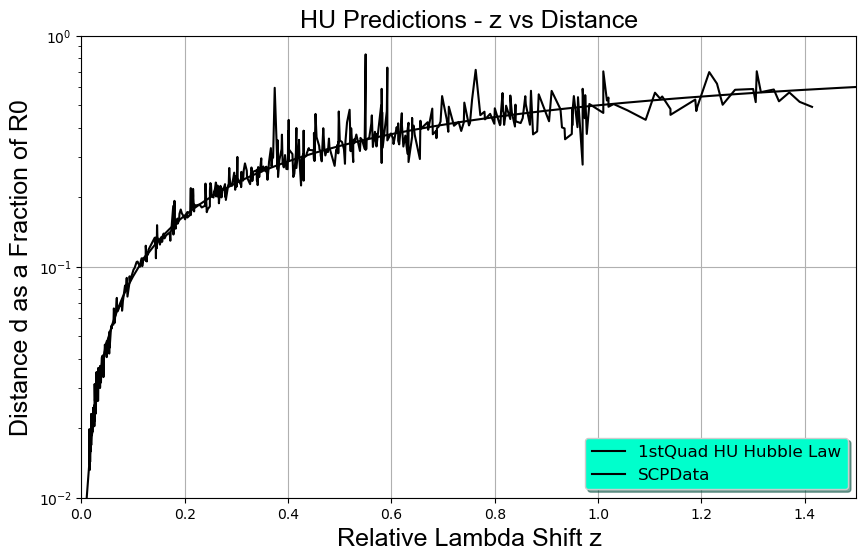

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
############################################
plt.semilogy(bigz,d_HU_big_corrected.d,'k-', label='1stQuad HU Hubble Law')
# plt.semilogy(d_HU_big_up_corrected.z,d_HU_big_up_corrected.d,'r.', label='2ndQuad HU Hubble Law')
plt.semilogy(z,d_bar_measured_corrected,'k-', label='SCPData')
# plt.semilogy(z,d_prime_4DLineOfSight,'k+', label='4DLineOfSightDistance')



plt.xlabel('Relative Lambda Shift z',**axis_font)
plt.ylabel('Distance d as a Fraction of R0',**axis_font)
plt.title('HU Predictions - z vs Distance',**title_font)
plt.grid(True)

ax.set_ylim(0.01,1)
ax.set_xlim(0,1.5)
legend = plt.legend(loc='lower right', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.savefig(parameters.imgAddress + "vcDistanceBothQuad.png")
plt.show()

In [13]:
np.shape(bigz),np.shape(d_HU_big_corrected)

((2050,), (2050, 2))

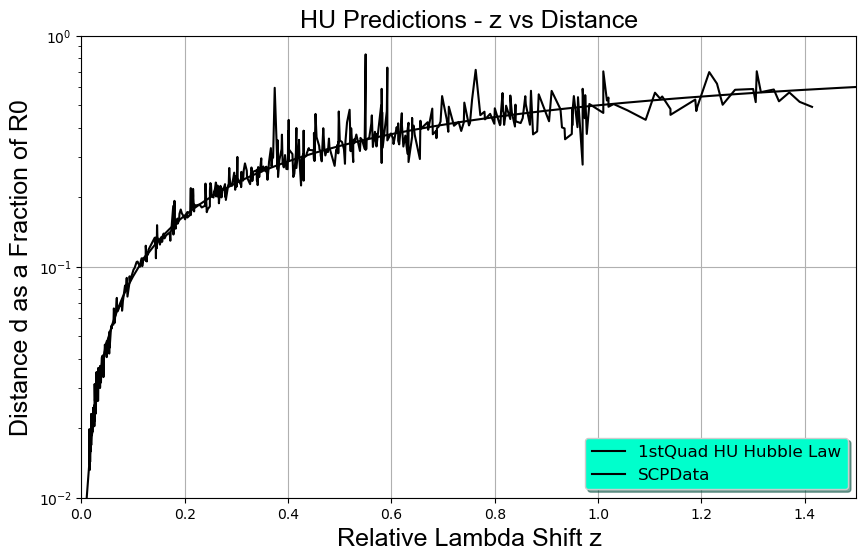

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
############################################
plt.semilogy(bigz,d_HU_big_corrected.d,'k-', label='1stQuad HU Hubble Law')
plt.semilogy(z,d_bar_measured_corrected,'k-', label='SCPData')

plt.xlabel('Relative Lambda Shift z',**axis_font)
plt.ylabel('Distance d as a Fraction of R0',**axis_font)
plt.title('HU Predictions - z vs Distance',**title_font)
plt.grid(True)

legend = plt.legend(loc='lower right', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
ax.set_ylim(0.01,1)
ax.set_xlim(0,1.5)
plt.savefig( parameters.imgAddress + "vcDistancesmall.png")
plt.show()

In [15]:
max(d_bar_measured_corrected)

0.8304619131165529

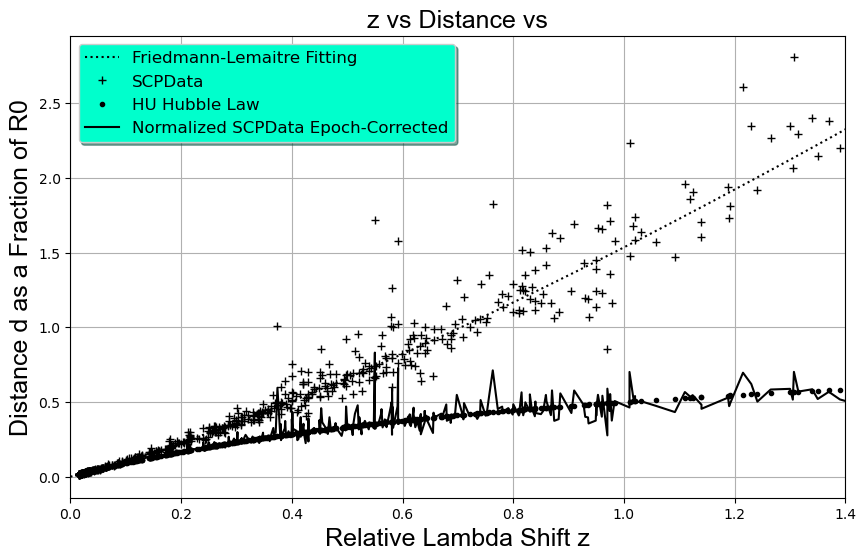

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size

plt.plot(HubbleGRData.z,HubbleGRData.d,'k:', label='Friedmann-Lemaitre Fitting')
plt.plot(z,d_bar_measured,'k+', label='SCPData')
plt.plot(z,d_HU_corrected,'k.', label='HU Hubble Law')
# Correcting Stellar Candles for Gravitational R(t) dependence
# The Absolute Luminosity should scale down with G ~ (R0/R(t))^(3/2)

plt.plot(z,d_bar_measured_corrected,'k-', label='Normalized SCPData Epoch-Corrected')

plt.xlabel('Relative Lambda Shift z',**axis_font)
plt.ylabel('Distance d as a Fraction of R0',**axis_font)
plt.title('z vs Distance vs',**title_font)
plt.grid(True)

legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
# plt.ylim(0,2.4)
ax.set_xlim(0,1.4)
plt.savefig(parameters.imgAddress + "vcDistance.png")
plt.show()

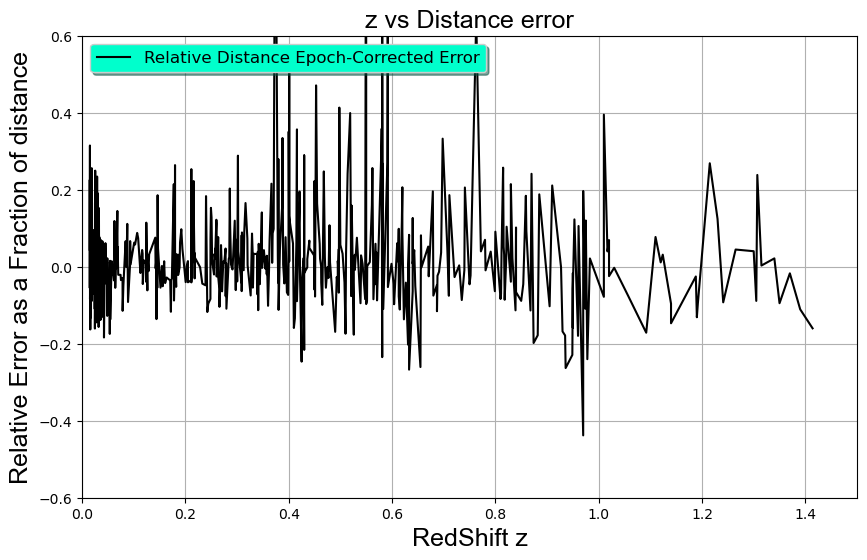

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size

relativeD_Error=[d_bar_measured_corrected[i]/d_HU_corrected[i]-1 for i in range(len(d_HU_corrected))]

plt.plot(z,relativeD_Error,'k-', label='Relative Distance Epoch-Corrected Error')
plt.xlabel('RedShift z',**axis_font)
plt.ylabel('Relative Error as a Fraction of distance',**axis_font)
plt.title('z vs Distance error',**title_font)
plt.grid(True)

legend = plt.legend(loc='upper left', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
ax.set_ylim(-0.6,0.6)
ax.set_xlim(0,1.5)
plt.savefig(parameters.imgAddress + "variance.png")
plt.show()

/tmp/ipykernel_81511/2863704950.py:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,1)


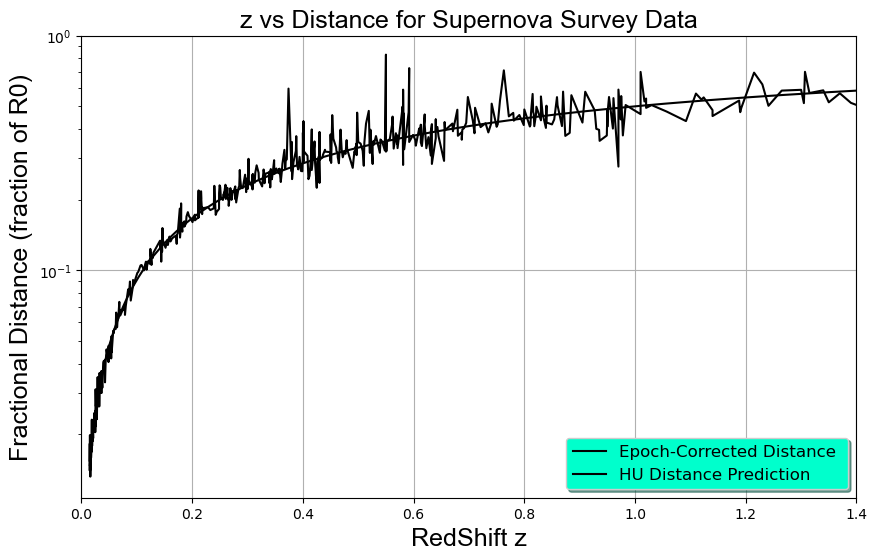

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
plt.semilogy(z,d_bar_measured_corrected,'k-', label='Epoch-Corrected Distance ')
plt.semilogy(z,d_HU_corrected,'k-', label='HU Distance Prediction')
# plt.semilogy(z,np.log(1+z),'k.', label='George Half-Backed Prediction')

plt.xlabel('RedShift z',**axis_font)
plt.ylabel('Fractional Distance (fraction of R0)',**axis_font)
plt.title('z vs Distance for Supernova Survey Data',**title_font)
plt.grid(True)

legend = plt.legend(loc='lower right', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
ax.set_ylim(0,1)
ax.set_xlim(0,1.4)
plt.savefig(parameters.imgAddress + "comparison.png")
plt.show()


# Just for sake of completeness, let recover the HU Law that would find the overestimated SN1A distances, that is, lets put back overestimation and find out how does it relates d and z

## To do that one just needs to rescale $(\frac{R_0-R(T)}{R_0})$ with $({\frac{R_0}{R(T)}})^{-\frac{3}{2}}$

$$overestimatedDistances(z)= (1- cos(\alpha)+sin(\alpha))(\frac{1}{cos(\alpha)-sin(\alpha)}) ^{-\frac{3}{2}}    $$

where $\alpha$ is given by:
$$\alpha = \frac{\pi}{4}- asin(\frac{1}{\sqrt2(1+z)})   ) $$

# Notice that this d(z) prediction of overestimated distances doesn't use a single parameters.

/tmp/ipykernel_81511/726293618.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(z,overestimatedDistances(z),'k.',color='r', label='HU Overestimated Distances Prediction')


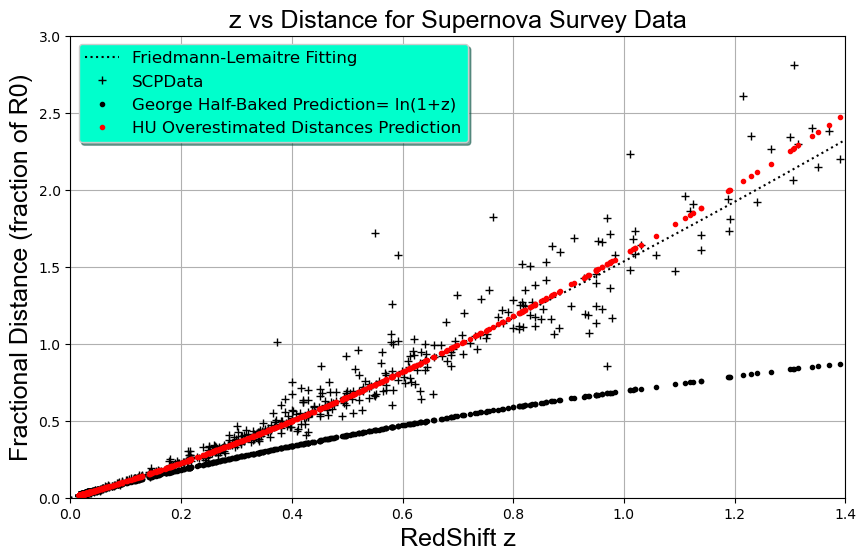

In [19]:
# George Disham Half-Backed Theory..:)
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
plt.plot(HubbleGRData.z,HubbleGRData.d,'k:', label='Friedmann-Lemaitre Fitting')
plt.plot(z,d_bar_measured,'k+', label='SCPData')
# plt.plot(z,d_bar_measured_corrected,'k-', label='Epoch-Corrected Distance ')
# plt.plot(z,d_HU_corrected,'k-', label='HU Distance Prediction')
plt.plot(z,np.log(1+z),'k.', label='George Half-Baked Prediction= ln(1+z)')
plt.plot(z,overestimatedDistances(z),'k.',color='r', label='HU Overestimated Distances Prediction')


plt.xlabel('RedShift z',**axis_font)
plt.ylabel('Fractional Distance (fraction of R0)',**axis_font)
plt.title('z vs Distance for Supernova Survey Data',**title_font)
plt.grid(True)

legend = plt.legend(loc='upper left', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
ax.set_ylim(0,3)
ax.set_xlim(0,1.4)
plt.savefig(parameters.imgAddress + "comparisonWithHalfBaked.png")
plt.show()

/tmp/ipykernel_81511/964702929.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(z,overestimatedDistances(z),'k.',color='r', label='HU Overestimated Distances Prediction')


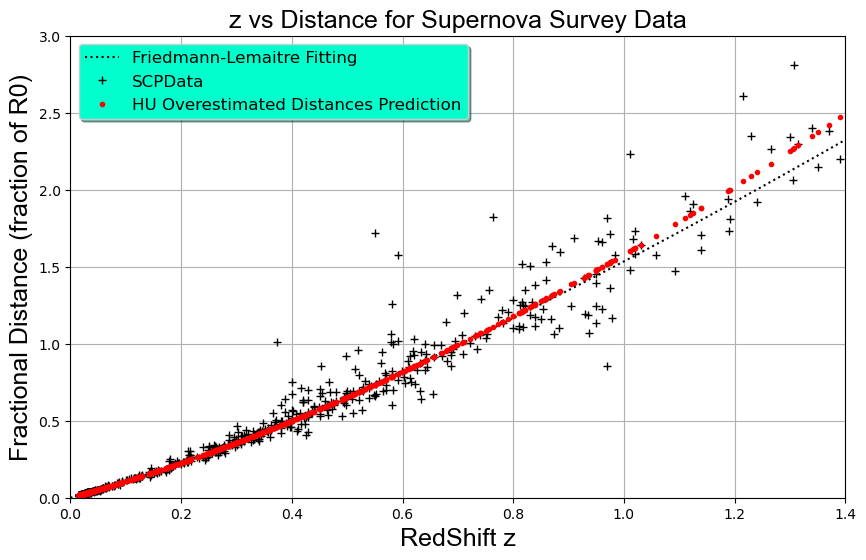

In [20]:
# George Disham Half-Backed Theory..:)
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size

plt.plot(HubbleGRData.z,HubbleGRData.d,'k:', label='Friedmann-Lemaitre Fitting')
plt.plot(z,d_bar_measured,'k+', label='SCPData')
# plt.plot(z,d_bar_measured_corrected,'k-', label='Epoch-Corrected Distance ')
# plt.plot(z,d_HU_corrected,'k-', label='HU Distance Prediction')
# plt.plot(z,np.log(1+z),'k.', label='George Half-Baked Prediction= ln(1+z)')
plt.plot(z,overestimatedDistances(z),'k.',color='r', label='HU Overestimated Distances Prediction')


plt.xlabel('RedShift z',**axis_font)
plt.ylabel('Fractional Distance (fraction of R0)',**axis_font)
plt.title('z vs Distance for Supernova Survey Data', **title_font)
plt.grid(True)
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y')
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
ax.set_ylim(0,3)
ax.set_xlim(0,1.4)
plt.savefig(parameters.imgAddress + "comparisonWithNoHalfBaked.png")
plt.show()

In [40]:
def d_modulus(obs):
    billionLY = 14.01E9*units.clyr/units.parsec
    return 5*np.log10(obs*billionLY)-5

scalefactor =np.sum(observed_values).value/np.sum(expected_values).value
observed_values = d_modulus(d_bar_measured_corrected)
expected_values = d_modulus(d_HU_corrected)*scalefactor
chisquare(f_obs=observed_values, f_exp=expected_values)


Power_divergenceResult(statistic=<Quantity 1.3904805>, pvalue=1.0)

In [ ]:
# [print(x,y) for x, y in zip (observed_values,expected_values)]

In [41]:
from scipy import signal
M= signal.correlate(observed_values,expected_values)
np.shape(M), np.shape(observed_values), np.shape(expected_values)

((1159,), (580,), (580,))

The best fitting R0 for the Supernova dataset is for H0=72, that corresponds to R0=13.58.  The best for CMB is R0=14.43, so there is a difference of 0.85 Billion Light Years difference between these two measurements!!!

Size in Inches [6. 6.]


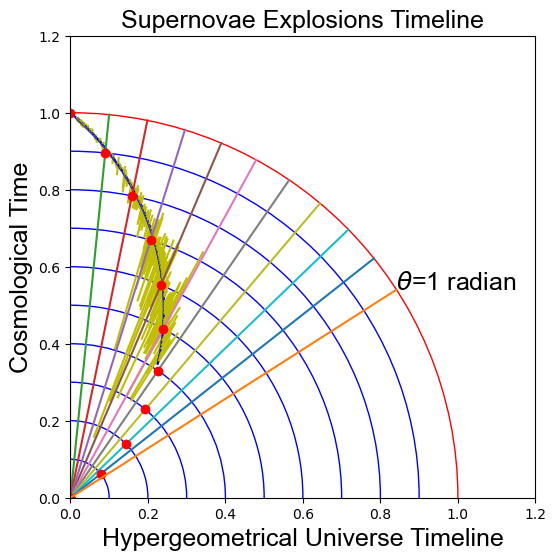

(2.9142929410626524, 10.665707058937347, 0.21460183660255172)

In [42]:
DefaultSize=[6,6]
axis_font = {'name':'Arial', 'size':'18'}

title_font = {'name':'Arial', 'size':'18'}
fig, ax = plt.subplots()
aa=3.7/np.pi
fig.set_size_inches( DefaultSize )# resetthe size
Size = fig.get_size_inches()
print ("Size in Inches", Size)
# define radiuses
radius = [x*0.1 for x in range(10)]
# print(radius)
plt.axis([0, 1.1, 0, 1.1])
plt.plot([0,0],[0,1.0])
x0 = [0,1]
allX=[x0]
for i in range(len(alpha_)):
    r=1-d_bar_measured_corrected[i]
    theta = alpha_[i]*aa
    x1=[r*np.sin(theta),r*np.cos(theta)]

    plt.plot([x0[0],x1[0]],[x0[1],x1[1]], color="y" )
    r = 1-d_HU_corrected[i]
    x2=[r*np.sin(theta),r*np.cos(theta)]
    allX.append(x2)
    plt.plot([x0[0],x2[0]],[x0[1],x2[1]], color='b' )
    x0=x2
# thetas = [x*math.pi/4*1/(len(radius)) for x in range(len(radius))]
ax.add_artist(plt.Circle(xy=(0,0),radius=1, color='r', fill=False))

thetas = [x/(len(radius)) for x in range(len(radius))]
for i in range(len(radius)):
    r=radius[i]
    x1=[np.sin(thetas[i]),np.cos(thetas[i])]
    plt.plot([0,x1[0]],[0,x1[1]] )
    x1=[(1-r)*np.sin(thetas[i]),(1-r)*np.cos(thetas[i])]
#     print(r,1-thetas[i])
    ax.plot([0,x1[0]],[0,x1[1]],'ro')
    ax.add_artist(plt.Circle(xy=(0,0),radius=r, color='b', fill=False))
ax.plot([0,0],[0,0],'ro')
ax.set_xlabel("Hypergeometrical Universe Timeline", **axis_font)
ax.set_ylabel("Cosmological Time", **axis_font)
ax.set_title("Supernovae Explosions Timeline", fontdict=title_font)
# plt.text(np.sin(math.pi/4),np.cos(math.pi/4), r'$\theta$=$\pi$/4', **axis_font)
plt.text(np.sin(1),np.cos(1), r'$\theta$=1 radian', **axis_font)
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 

plt.plot([0,np.sin(1)],[0,np.cos(1)])
# plt.plot([0,np.sin(math.pi/4)],[0,np.cos(math.pi/4)])
ax.set_ylim(0.0,1.2)
ax.set_xlim(0,1.2)
plt.savefig(parameters.imgAddress + "UniverseTimeline.png")
plt.show()
# AGE OF THE UNIVERSE WHEN THE COSMIC BACKGROUND WAS FORMED!
(1-math.pi/4)*13.58, math.pi/4*13.58,1-math.pi/4

Here we will discuss the reasons for misinterpretation of the Universe Acceleration

Consider
$$byears=1E9*365*24*3600$$
$$bly=byears*c$$
$$R_0 = 13.58*bly$$

Acceleration is given by:
$$acc=\frac{3c^2}{4{R_0}}a^{-\frac{7}{2}}(5-a)$$

If one consider instead of $$meters/second^2$$ using units of a $$\frac{R_0}{byears^2}$$
the equation can be rewritten as:
$$acc=\frac{3}{4*{13.58^2}}a^{-\frac{7}{2}}(5-a)$$
or
$$acc={0.4067 Percent}*a^{-\frac{7}{2}}(5-a)$$

Currently that would yield:
1.626% per billion years

In [43]:
a= pd.DataFrame([0.01*x for x in range(600)])
byears=1E9*365*24*3600
bly=byears*constants.c
R_0 = 13.8E9*365*24*3600*constants.c
cSquaredR0=constants.c**2/R_0*(byears)**2/R_0
acc=3/4*(a**(-7/2))*(5-a)*cSquaredR0
acc.index=a[0]

## Current Acceleration (acceleration for a=1)

$$acc=\frac{3c^2}{4*{13.58^2}}a^{-\frac{7}{2}}(5-a)$$

$$acc=\frac{3}{(13.58)^2}=0.016267533690062272$$

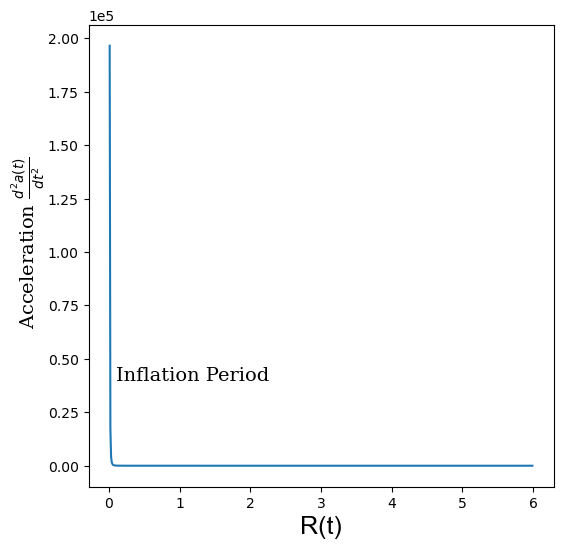

<Figure size 640x480 with 0 Axes>

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# reset the size

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.text(0.1, 4e4, r'Inflation Period', fontdict=font)
ax.text(-1.4, 7e4, r'Acceleration $\frac{d^2a(t)}{dt^2}$', rotation='vertical',fontdict=font)
ax.set_xlabel("R(t)", **axis_font)
ax.plot(acc)
plt.show()
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
ax.set_xlim([0,0.5])
ax.set_ylim([0E0,1.0E5])
plt.savefig(parameters.imgAddress + "missAcceleration.png")

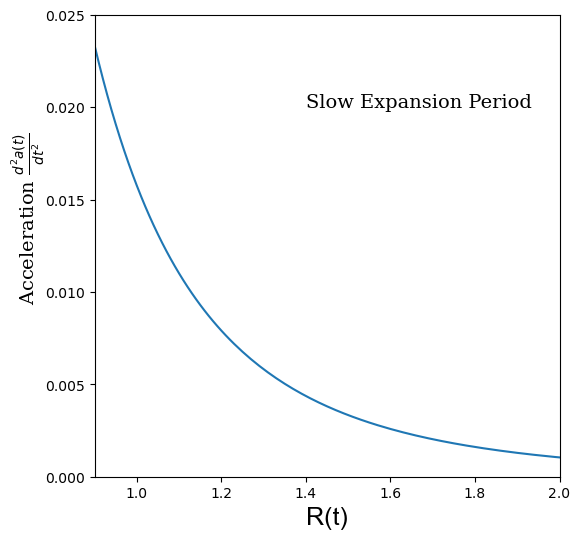

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size


acc.plot(ax=ax, legend=False)
ax.set_xlabel("R(t)", **axis_font)
ax.text(1.4, 0.02, r'Slow Expansion Period', fontdict=font)
ax.text(0.7, 0.01, r'Acceleration $\frac{d^2a(t)}{dt^2}$', rotation="vertical",fontdict=font)
ax.set_xlim([0.9,2])
ax.set_ylim([0.0,0.025])
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
plt.savefig(parameters.imgAddress + "missAcceleration1.png")

# Below is the application of the theory to the usd Wil Supernova (z=1.917)

In [64]:
# Cosmological Angle
def alpha(z):
    return [math.pi/4 - math.asin(1/math.sqrt(2)/(1+x)) for x in z]
# 4D Radius of the Universe
def RofT(z):
    a = alpha(z)
    return [math.cos(x) - math.sin(x) for x in a]
# Distance to the Epoch
def DistanceOfT(z):
    d= 13.58
    return [(1-x)*d for x in RofT(z)]

In [65]:
z=[1.307,1.917,3.8993]
alpha(z), RofT(z), DistanceOfT(z)

([0.47387915148246923, 0.5405501162886575, 0.640564208946314],
 [0.4334633723450369, 0.3428179636612959, 0.20411079133753807],
 [7.693567403554399, 8.924532053479602, 10.808175453636233])

If I want to know what is the currently perceived distance, I just have to multiply the actual distance by $RofT(z)^{-1.5}$

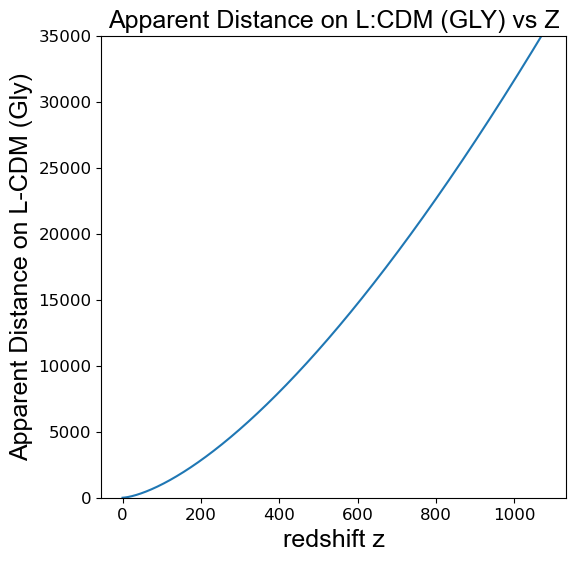

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
ApparentDistance={}
ApparentDistance['z']=list(range(1080))
ApparentDistance['DL'] = [(1-RofT([x])[0])*(RofT([x])[0])**(-1.5) for x in ApparentDistance['z']]
ApparentDistance
ApparentDistance=pd.DataFrame.from_dict(ApparentDistance)
ApparentDistance.plot(ax=ax,x='z',y='DL',ylim=[0,35000],  legend=False,fontsize=12)
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
plt.xlabel('redshift z', **axis_font)
plt.ylabel('Apparent Distance on L-CDM (Gly)', **axis_font)
plt.title('Apparent Distance on L:CDM (GLY) vs Z',**title_font)
plt.savefig(parameters.imgAddress + "ApparentDistanceLCDM.png")

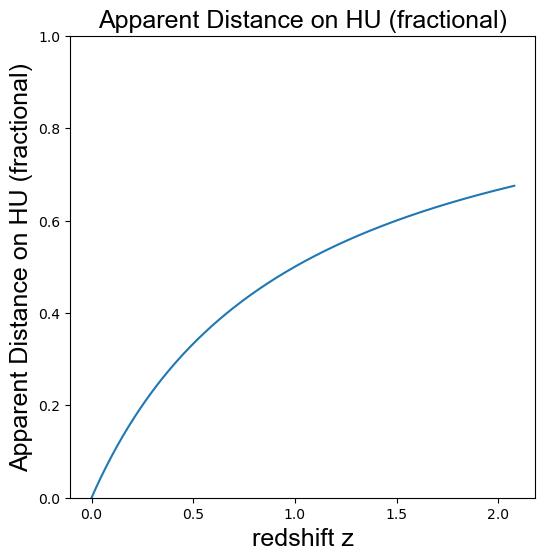

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
ApparentDistance={}
ApparentDistance['z']=list([x*0.001 for x in range(2080)])
ApparentDistance['DL'] = [(1-RofT([x])[0]) for x in ApparentDistance['z']]
ApparentDistance
ApparentDistance=pd.DataFrame.from_dict(ApparentDistance)
ApparentDistance.plot(ax=ax, x='z',y='DL',ylim=[0,1],  legend=False)
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
plt.xlabel('redshift z',**axis_font)
plt.ylabel('Apparent Distance on HU (fractional)',**axis_font)
plt.title('Apparent Distance on HU (fractional)',**title_font)
plt.savefig(parameters.imgAddress + "ApparentDistanceHU.png")

# This Supernova should be at 8.924 billion light-years away (in an Universe that has a 4D Radius of 13.58 bly).  The farthest (z=3.8993) has an apparent distance of 117 billion light-years but it is located at 10.8 billion light years.  

# That Supernova exploded when the Universe was 13.58-10.8=2.78 billion years old

Optical Spectra Catalog Data
Catalogs of parameters derived from the SDSS/BOSS optical spectra and matched to photometric data are documented on the optical spectra data page. These can be directly downloaded from the links on that page, or via wget commands. For example, to download the redshifts and classifications of all SDSS spectra (4.5 GB):

wget --spider http://data.sdss3.org/sas/dr12/sdss/spectro/redux/specObj-dr12.fits
Or to get the associated photometric position based matches (12 GB):

wget --spider http://data.sdss3.org/sas/dr12/sdss/spectro/redux/photoPosPlate-dr12.fits
The stellar parameter (SSPP) results can be downloaded similarly (1.8 GB):

wget --spider http://data.sdss3.org/sas/dr12/sdss/sspp/ssppOut-dr10.fits


# Here we create a simulated observation_values out of a known Gaussian distributed errors array. The predicted values match the observed values within a 1% Gaussian Distributed error band.  No bias.

(Power_divergenceResult(statistic=array([1.3904805]), pvalue=array([1.])),
 0.268234247598854)

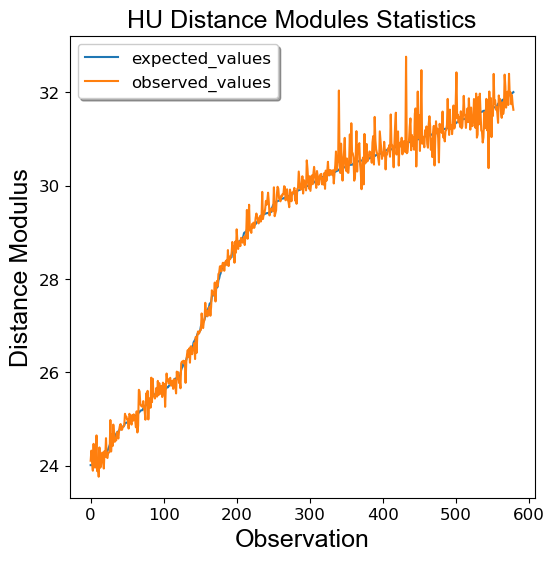

In [82]:
fig, ax = plt.subplots()

fig.set_size_inches( DefaultSize )# resetthe size
observed_values = pd.DataFrame(d_modulus(d_bar_measured_corrected), columns=['observed_values'])
expected_values = pd.DataFrame(d_modulus(d_HU_corrected), columns=['expected_values'])
expected_values.plot(ax=ax, fontsize=12)
observed_values.plot(ax=ax, fontsize=12)
plt.title('HU Distance Modules Statistics', fontdict=title_font)
plt.xlabel('Observation', **axis_font)
plt.ylabel('Distance Modulus', **axis_font)
plt.savefig(parameters.imgAddress + "HUDistanceModulusStat.png")
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
scalefactor =observed_values.observed_values.values.sum()/expected_values.expected_values.values.sum()
chisquare(observed_values, f_exp=expected_values*scalefactor), np.std(observed_values.values-expected_values.values)

(Power_divergenceResult(statistic=array([1.2120688]), pvalue=array([1.])),
 0.2470790629955722)

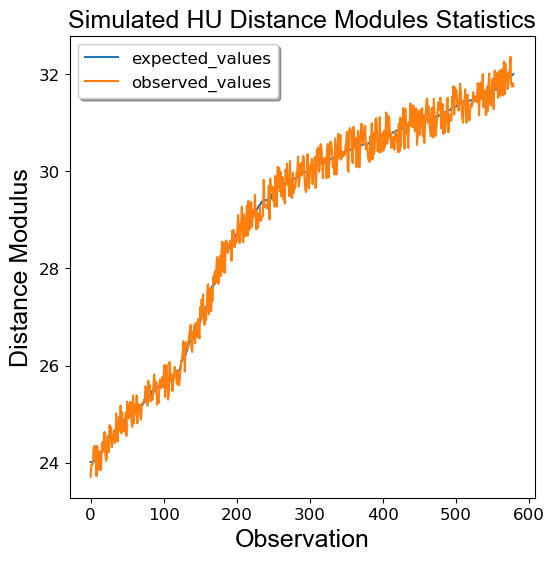

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
x=0.030
expected_values = pd.DataFrame(d_modulus(d_HU_corrected))
randomAdj = pd.DataFrame(np.random.rand(expected_values.shape[0]))-0.5
observed_values = expected_values*(1+ x* randomAdj)
expected_values.columns=['expected_values']
observed_values.columns=['observed_values']
expected_values.plot(ax=ax,fontsize=12)
observed_values.plot(ax=ax)
plt.title('Simulated HU Distance Modules Statistics',fontdict=title_font)
plt.xlabel('Observation',**axis_font)
plt.ylabel('Distance Modulus',**axis_font)
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
plt.savefig(parameters.imgAddress + "HUDistanceModulusStatSimulated.png")
scalefactor =observed_values.observed_values.values.sum()/expected_values.expected_values.values.sum()
chisquare(observed_values, f_exp=expected_values*scalefactor), np.std(observed_values.values-expected_values.values)

In [85]:
np.mean(observed_values)/2.5131111621858482

11.527807543453745

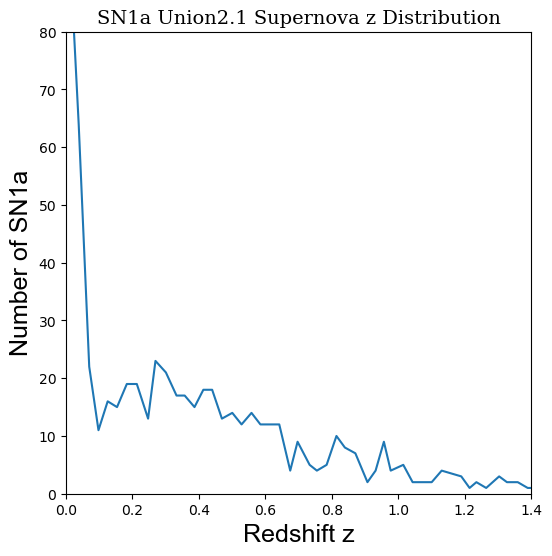

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches( DefaultSize )# resetthe size
data = SCPData['redshift']
bins=np.linspace(0,1.4,50)
digitized = np.digitize(data, bins)
digUnique= np.unique(digitized)
bin_means = [np.mean(data[digitized == i]) for i in digUnique ]
bin_count = [np.size(digitized[digitized == i]) for i in digUnique ]
x=pd.DataFrame(bin_means)[0]
y=pd.DataFrame(bin_count)[0]
plt.plot(x,y)
ax.set_xlim(0.0,1.40)
ax.set_ylim(0.0,80.0)
plt.title("SN1a Union2.1 Supernova z Distribution", fontdict=font)
plt.xlabel("Redshift z",**axis_font)
plt.ylabel("Number of SN1a",**axis_font)
plt.savefig(parameters.imgAddress + "SN1a_SupernovaZDistribution.png")

In [87]:
densityOfUniverse=constants.c**2/(0.776*2*np.pi**2*constants.G*R0_GLY**2).si;densityOfUniverse

<Quantity 4.98933486e-09 kg / m3>

In [88]:
hydrogenmass= constants.m_e+ constants.m_p

In [89]:
densityOfUniverse/hydrogenmass

<Quantity 2.98131873e+18 1 / m3>

In [90]:
0.43*hydrogenmass/(1E-15*units.m)**3

<Quantity 7.19619131e+17 kg / m3>

In [91]:
TotalMassOfHypersphericalUniverse=(densityOfUniverse*2*np.pi**2*R0_GLY**3).si
TotalMassOfHypersphericalUniverse

<Quantity 2.30342855e+44 kg>

In [92]:
# Initial 4D radius of the Universe
densityOfBlackHole =  7.19E-17* units.kg/units.m**3
Initial4DRadius =np.sqrt(  constants.c**2/(0.776*2*np.pi**2*constants.G*densityOfBlackHole).si )


In [93]:
Initial4DRadius.to(units.lyr)

<Quantity 116878.06010451 lyr>